# [Project 1] 자동차 리콜 데이터 분석

---

## 프로젝트 목표
- 한국교통안전공단 자동차 결함 리콜 데이터를 분석하여 유의미한 정보 도출한다.
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습한다.

---

## 프로젝트 목차
1. **데이터 읽기:** <br>
    : 자동차 리콜 데이터를 불러오고 Dataframe 구조를 확인한다. <br>
    1.1. 데이터 불러오기<br>
<br>
2. **데이터 정제:** <br>
    : 결측치 확인 및 기초적인 데이터 변형한다. <br>
    2.1. 결측치 확인<br>
    2.2. 중복값 확인<br>
    2.3. 기초적인 데이터 변형<br>
<br>
3. **데이터 시각화:** <br>
    : 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악한다. <br>
    3.1. 제조사별 리콜 현황 출력<br>
    3.2. 모델별 리콜 현황 출력<br>
    3.3. 월별 리콜 현황 출력<br>
    3.4. 생산연도별 리콜 현황 출력<br>
    3.5. 4분기 제조사별 리콜 현황 출력<br>
    3.6. 하반기 생산연도별 리콜 현황 출력<br>
    3.7. 워드 클라우드를 이용한 리콜 사유 시각화<br>

---

## 프로젝트 개요

리콜(recall)은 제품의 설계나 제조 과정에서 결함이 발견되었을 때, 소비자의 안전과 만족을 위해 판매자가 무상으로 수리, 점검 또는 교환을 제공하는 소비자 보호 제도이다. 오늘날 자동차는 많은 가정에서 필수적인 생활용품으로 자리 잡았지만, 안전성과 관련된 문제는 여전히 간헐적으로 제기되고 있다. 이에 따라 자동차 리콜 사태가 주목받으며 사회적 관심을 불러일으키는 경우도 종종 발생하고 있다.

이번 프로젝트에서는 한국교통안전공단에서 제공한 2020년 자동차 결함 리콜 데이터를 활용하여 의미 있는 패턴과 인사이트를 도출하고, 이를 효과적으로 시각화하는 실습을 진행한다.

---

## 데이터 출처
-  https://www.data.go.kr/data/3048950/fileData.do

---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인.

데이터는 data 폴더 속 p1_한국교통안전공단_자동차결함 리콜현황_20201231.csv 파일을 이용한다.

### 1.1. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("seaborn lib version : ", sns.__version__)
# missingno라는 라이브러리가 설치되어 있을 경우 import
try:
    import missingno as msno
# missingno라는 라이브러리가 설치되어 있지 않을 경우 설치 후 import
except:
    !pip install missingno
    import missingno as msno

seaborn lib version :  0.13.2


In [ ]:
# pd.read_csv를 통하여 dataframe 형태로 읽어온다.
df = pd.read_csv("데이터 파일의 경로 작성", encoding="euc-kr")

In [ ]:
# 상위 5개 데이터를 출력한다.
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [ ]:
# 상위 10개 데이터를 출력한다.
df.head(10)

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
5,만트럭버스코리아(주),TGS 카고,2016-04-11,2016-07-21,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
6,만트럭버스코리아(주),TGS 카고,2016-04-29,2016-04-29,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
7,만트럭버스코리아(주),TGS 카고,2015-03-25,2016-04-01,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
8,만트럭버스코리아(주),TGX 트랙터,2015-03-25,2016-07-04,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...
9,만트럭버스코리아(주),TGX 트랙터,2015-05-05,2016-09-15,2020-01-31,비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 ...


In [ ]:
# 하위 5개 데이터를 출력한다.
df.tail()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
1270,한국닛산(주),INFINITI M30,2012-02-06,2012-02-06,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,한국닛산(주),INFINITI M30d,2012-07-18,2013-06-28,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,한국닛산(주),INFINITI Q70 3.0d,2013-09-18,2015-06-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,한국닛산(주),INFINITI M56,2010-05-25,2011-11-23,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1274,한국닛산(주),INFINITI Q70 5.6,2014-04-08,2014-04-08,2020-12-28,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [ ]:
# dataframe 정보를 요약하여 출력한다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제작자     1275 non-null   object
 1   차명      1275 non-null   object
 2   생산기간    1275 non-null   object
 3   생산기간.1  1275 non-null   object
 4   리콜개시일   1275 non-null   object
 5   리콜사유    1275 non-null   object
dtypes: object(6)
memory usage: 59.9+ KB


---

## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 중복값(duplicates)을 처리하고 열 이름 변경과 같은 기초적인 데이터 변형을 진행한다.

### 2.1. 결측치 확인

`missingno.matrix()` 함수를 이용하여 결측치를 시각화한다.

In [ ]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# matplotlib 캐시 삭제
!rm -rf ~/.cache/matplotlib

# 나눔글꼴 설치
!sudo apt-get -qq -y install fonts-nanum

# 폰트 캐시 리빌드
!fc-cache -fv

# 설치된 폰트 확인
!fc-list | grep Nanum

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share

In [ ]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

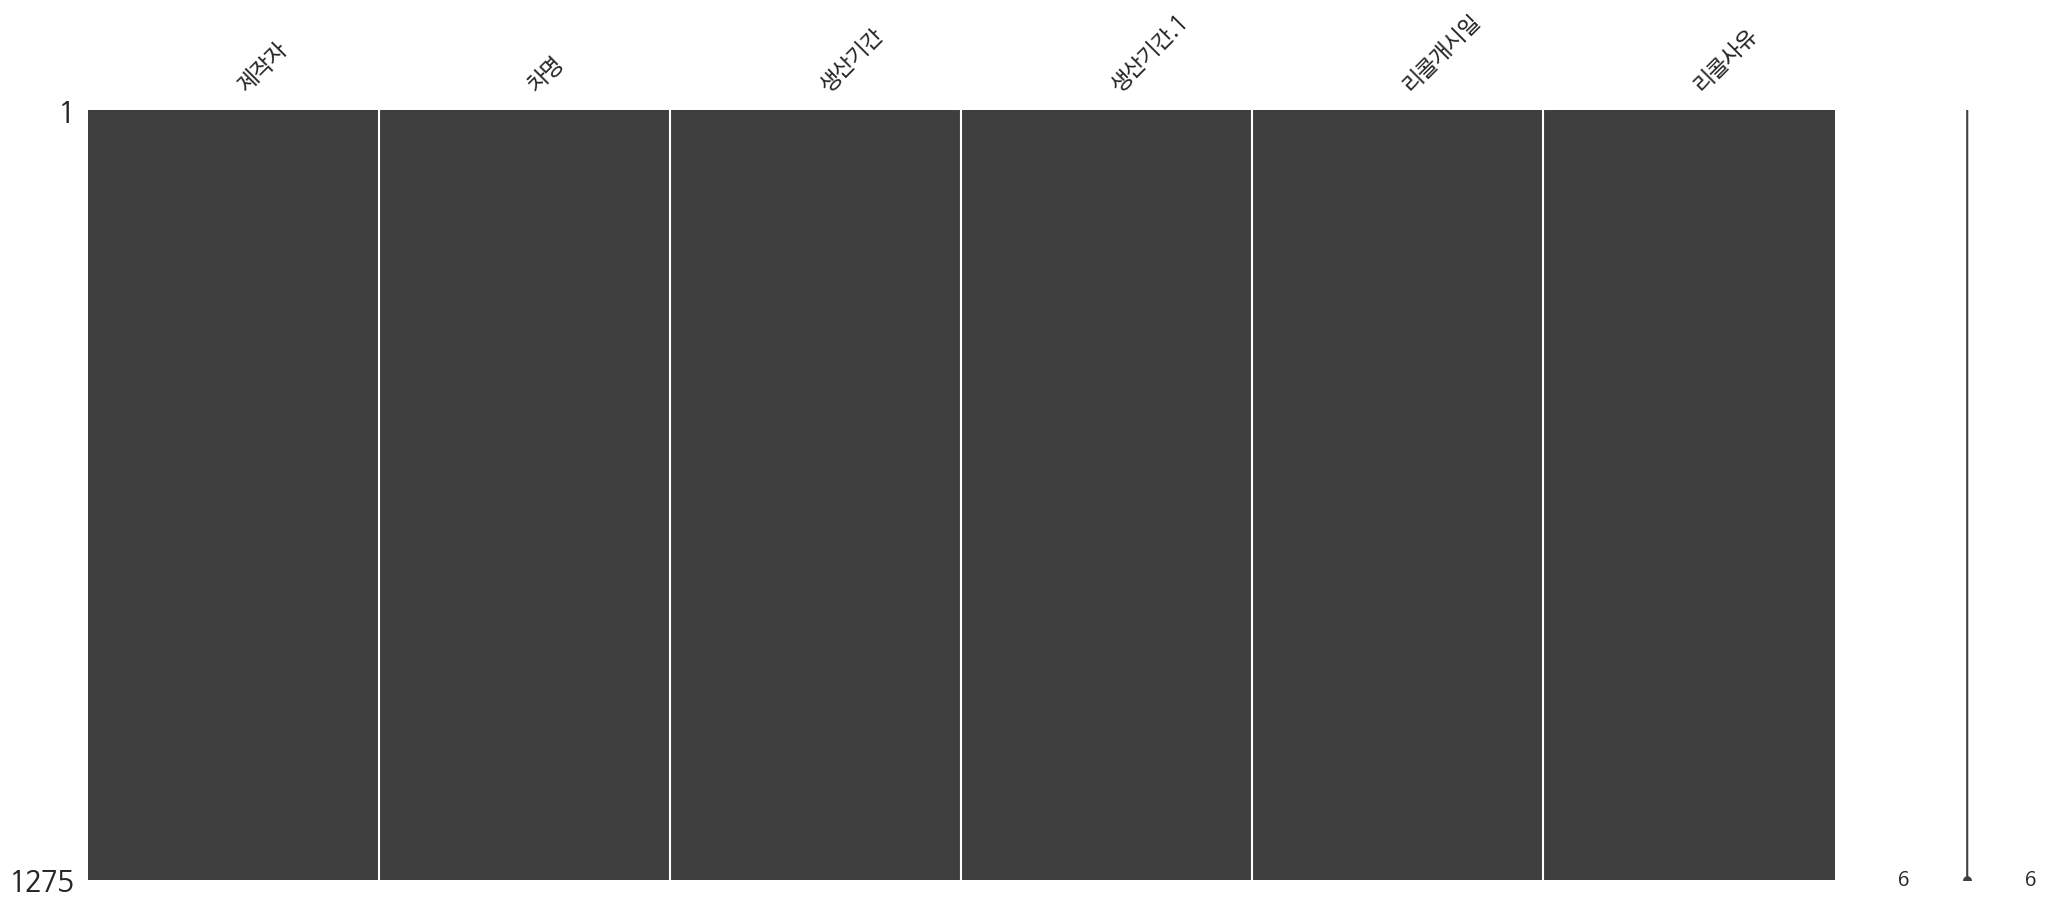

In [ ]:
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False})
msno.matrix(df)
plt.show()

`isna()` 함수를 이용하여 결측치를 확인한다.

In [ ]:
# 각 열 별로 결측치의 갯수를 반환한다. (True:1, False:0)
#df.isna()
df.isna().sum()

,0
manufacturer,0
model,0
cause,0
start_year,0
start_month,0
start_day,0
end_year,0
end_month,0
end_day,0
recall_year,0


### 2.2. 중복값 확인

`duplicated()` 함수를 이용하여 중복값을 확인한다.

In [ ]:
# df.duplicated(keep="first")
# first : 첫 번째 중복 항목을 제외한 나머지를 True 표시 , 기본값
#df.duplicated(keep="last")
# last : 마지막 중복 항목을 제외한 나머지를 True로 표시
#df.duplicated(keep="first")
#False : 모든 중복 항목을 True로 표시

df[df.duplicated(keep=False)]

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
34,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...
82,비엠더블유코리아(주),BMW 316i,2001-01-09,2001-01-09,2020-02-07,차량이 고온 다습한 지역에 장기간 노출 되었을 때 에어백 인플레이터 내부 압축가스 ...


`drop_duplicates()` 함수를 이용하여 중복값을 제거한다.

In [ ]:
print("Before:", len(df))

df = df.drop_duplicates()

print("After:", len(df))

Before: 1275
After: 1274


### 2.3. 기초적인 데이터 변형

현재 `생산기간`, `생산기간.1`, `리콜개시일` 열은 모두 `object` 타입, 즉 문자열로 인식되고 있습니다. 분석을 위해 연도, 월, 일을 각각 정수형으로 저장한다. <br>
추가적으로 분석의 편리를 위해 열 이름을 영어로 바꿔준다.

In [ ]:
df.head()

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,한국토요타자동차(주),토요타 캠리,2019-08-23,2019-09-06,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,한국토요타자동차(주),토요타 캠리 하이브리드,2019-08-21,2019-09-04,2020-01-23,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."


In [ ]:
# 2014-05-28
# 0123'4'56'7'89
# 2014
def parse_year(s):
    return int(s[:4])
# 05
def parse_month(s):
    return int(s[5:7])
# 28
def parse_day(s):
    return int(s[8:])

# Pandas DataFrame에서는 row별로 loop를 도는 것이 굉장히 느리기 때문에, apply() 함수를 이용하여 벡터 연산을 진행.
# apply() : 각 열에 대해 함수를 적용해서 새로운 열을 생성

df['start_year'] = df['생산기간'].apply(parse_year)
df['start_month'] = df['생산기간'].apply(parse_month)
df['start_day'] = df['생산기간'].apply(parse_day)

df['end_year'] = df['생산기간.1'].apply(parse_year)
df['end_month'] = df['생산기간.1'].apply(parse_month)
df['end_day'] = df['생산기간.1'].apply(parse_day)

df['recall_year'] = df['리콜개시일'].apply(parse_year)
df['recall_month'] = df['리콜개시일'].apply(parse_month)
df['recall_day'] = df['리콜개시일'].apply(parse_day)

df.head(3)

<ipython-input-15-bfeeae7a1f5e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_year'] = df['생산기간'].apply(parse_year)
<ipython-input-15-bfeeae7a1f5e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_month'] = df['생산기간'].apply(parse_month)
<ipython-input-15-bfeeae7a1f5e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,제작자,차명,생산기간,생산기간.1,리콜개시일,리콜사유,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,2014-05-28,2016-03-15,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,2014-05-08,2016-03-14,2020-03-23,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,2019-07-11,2019-07-31,2020-01-23,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


In [ ]:
# 불필요한 열은 버리고, 열 이름을 재정의.
df = df.drop(columns=['생산기간', '생산기간.1', '리콜개시일']).rename(columns={'제작자': "manufacturer", "차명": "model", "리콜사유": "cause"})
df.head(3)

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23


본 분석에서는 2020년의 데이터만을 대상으로하므로, 그 외의 데이터가 있다면 삭제.

In [ ]:
# 2019년의 데이터가 함께 존재함.
df.recall_year.min(), df.recall_year.max()

(2019, 2020)

In [ ]:
# 2020년의 데이터만을 남김.
df = df[df['recall_year']==2020]
len(df)

1263

---

## 3. 데이터 시각화

각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아본다.

### 3.1. 제조사별 리콜 현황 출력

제조사별 리콜 건수 분포를 막대 그래프로 확인해본다.

In [ ]:
df.head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
0,(주)에프엠케이,기블리 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,28,2016,3,15,2020,3,23
1,(주)에프엠케이,콰트로포르테 디젤,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...,2014,5,8,2016,3,14,2020,3,23
2,한국토요타자동차(주),토요타 프리우스,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품...",2019,7,11,2019,7,31,2020,1,23
3,한국토요타자동차(주),토요타 캠리,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,23,2019,9,6,2020,1,23
4,한국토요타자동차(주),토요타 캠리 하이브리드,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부...",2019,8,21,2019,9,4,2020,1,23


In [ ]:
df.groupby("manufacturer").count()['model']

,model
manufacturer,
(주) 다빈월드,1
(주) 바이크코리아,12
(주) 한국모터트레이딩,16
(주)볼보자동차코리아,39
(주)스즈키씨엠씨,1
(주)스포츠모터사이클코리아,4
(주)에이비케이,2
(주)에프엠케이,9
(주)재규어랜드로버코리아,7


In [ ]:
df.groupby("manufacturer").count()["model"].sort_values(ascending=False)

,model
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
기아자동차(주),19
(주) 한국모터트레이딩,16


In [ ]:
pd.DataFrame(df.groupby("manufacturer").count()["model"].sort_values(ascending=False))

,model
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
기아자동차(주),19
(주) 한국모터트레이딩,16


In [ ]:
pd.DataFrame(df.groupby("manufacturer").count()["model"].sort_values(ascending=False)).rename(columns={"model": "count"})

,count
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
기아자동차(주),19
(주) 한국모터트레이딩,16


In [ ]:
tmp = pd.DataFrame(df.groupby("manufacturer").count()["model"].sort_values(ascending=False)).rename(columns={"model": "count"})

tmp

,count
manufacturer,
비엠더블유코리아(주),526
메르세데스벤츠코리아(주),234
아우디폭스바겐코리아(주),115
한불모터스(주),71
한국토요타자동차(주),54
(주)볼보자동차코리아,39
현대자동차(주),28
기아자동차(주),19
(주) 한국모터트레이딩,16


<ipython-input-25-181d0ece4733>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="manufacturer", data=df, palette="Set2",order=tmp.index)


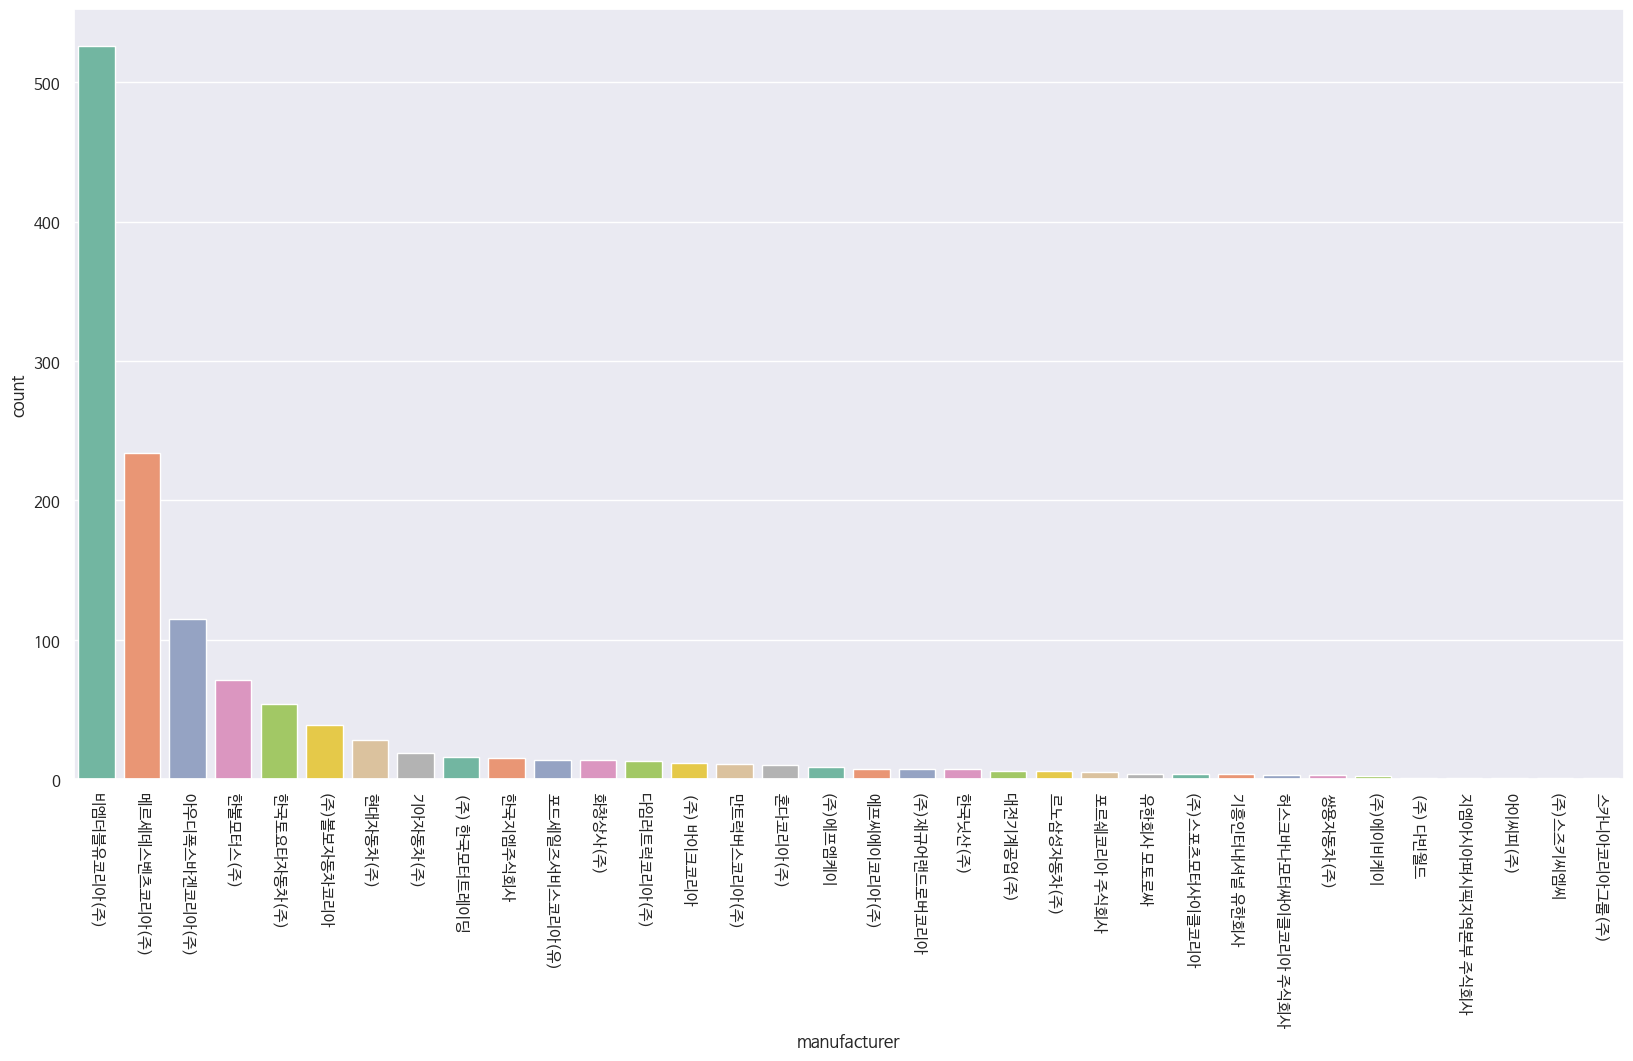

In [ ]:
plt.figure(figsize=(20,10))
# 한글 출력을 위해서 폰트 옵션을 설정한다.
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')

#countplot() :
ax = sns.countplot(x="manufacturer", data=df, palette="Set2",order=tmp.index)
plt.xticks(rotation=270)
plt.show()

In [ ]:
tmp.index

Index(['비엠더블유코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '한불모터스(주)',
       '한국토요타자동차(주)', '(주)볼보자동차코리아', '현대자동차(주)', '기아자동차(주)', '(주) 한국모터트레이딩',
       '한국지엠주식회사', '포드세일즈서비스코리아(유)', '화창상사(주)', '다임러트럭코리아(주)', '(주) 바이크코리아',
       '만트럭버스코리아(주)', '혼다코리아(주)', '(주)에프엠케이', '에프씨에이코리아(주)', '(주)재규어랜드로버코리아',
       '한국닛산(주)', '대전기계공업(주)', '르노삼성자동차(주)', '포르쉐코리아 주식회사', '유한회사 모토로싸',
       '(주)스포츠모터사이클코리아', '기흥인터내셔널 유한회사', '허스크바나모터싸이클코리아 주식회사', '쌍용자동차(주)',
       '(주)에이비케이', '(주) 다빈월드', '지엠아시아퍼시픽지역본부 주식회사', '아이씨피(주)', '(주)스즈키씨엠씨',
       '스카니아코리아그룹(주)'],
      dtype='object', name='manufacturer')

### 3.2. 모델별 리콜 현황 출력

차량 모델별 리콜 건수 분포를 막대 그래프로 확인한다.

In [ ]:
pd.DataFrame(df.groupby("model").count()["start_year"].sort_values(ascending=False)).rename(columns={"start_year": "count"}).head(50)

,count
model,
BMW 320d,15
BMW 520d,15
BMW X3 xDrive20d,11
BMW 520d xDrive,10
BMW 320d Gran Turismo,9
BMW X6 xDrive30d,9
MINI Cooper D,8
BMW 320d xDrive Gran Turismo,8
BMW X5 xDrive30d,8


모델의 데이터가 굉장히 많으므로, 상위 50개 모델만 뽑아서 시각화를 진행한다.

In [ ]:
tmp = pd.DataFrame(df.groupby("model").count()["manufacturer"].sort_values(ascending=False))
tmp = tmp.rename(columns={"manufacturer": "count"}).iloc[:50]

len(tmp)

50

In [ ]:
df['model']
df.model

,model
0,기블리 디젤
1,콰트로포르테 디젤
2,토요타 프리우스
3,토요타 캠리
4,토요타 캠리 하이브리드
...,...
1270,INFINITI M30
1271,INFINITI M30d
1272,INFINITI Q70 3.0d
1273,INFINITI M56


<ipython-input-37-4528a9dd5d54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="model", data=df[df.model.isin(tmp.index)], palette="Set2", order=tmp.index)


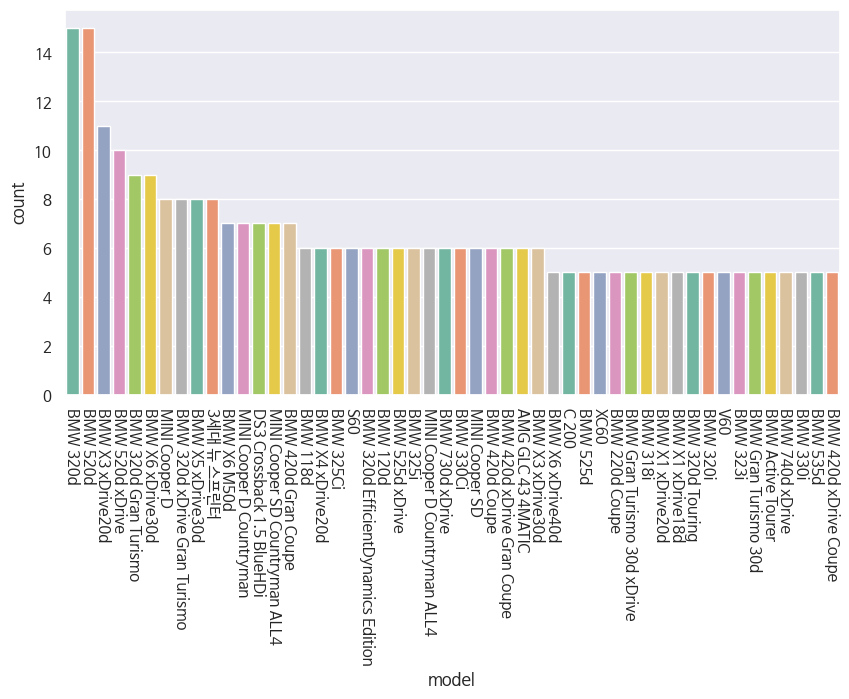

In [ ]:
# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x="model", data=df[df.model.isin(tmp.index)], palette="Set2", order=tmp.index)

plt.xticks(rotation=270)
plt.show()

### 3.3. 월별 리콜 현황 출력

**실습 1**
- 월별 리콜 건수 분포를 확인하는 코드를 작성해주세요

In [ ]:
# 월별 리콜 건수 확인 코드

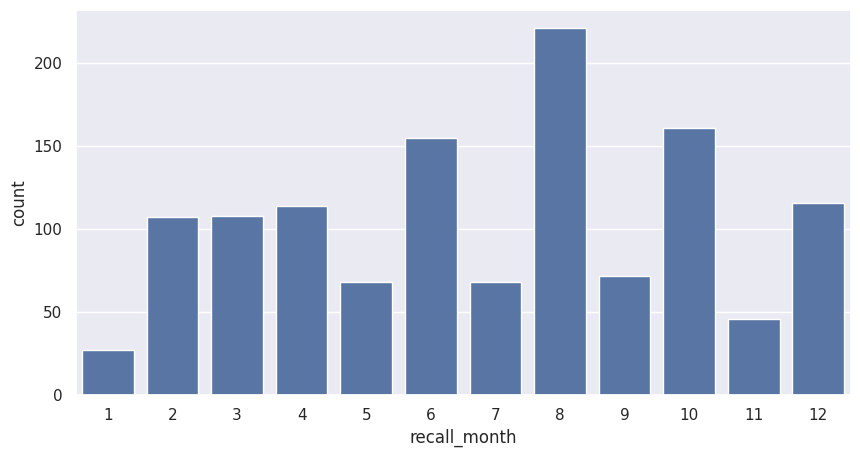

In [ ]:
# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
sns.set(style="darkgrid")
df['recall_month'] = df['recall_month'].astype('category')
ax = sns.countplot(x="recall_month", data=df)
plt.show()

### 3.4. 생산연도별 리콜 현황 출력

이번에는 생산연도별 리콜 현황을 꺾은선 그래프로 알아본다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1263 entries, 0 to 1274
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   manufacturer  1263 non-null   object  
 1   model         1263 non-null   object  
 2   cause         1263 non-null   object  
 3   start_year    1263 non-null   int64   
 4   start_month   1263 non-null   int64   
 5   start_day     1263 non-null   int64   
 6   end_year      1263 non-null   int64   
 7   end_month     1263 non-null   int64   
 8   end_day       1263 non-null   int64   
 9   recall_year   1263 non-null   int64   
 10  recall_month  1263 non-null   category
 11  recall_day    1263 non-null   int64   
dtypes: category(1), int64(8), object(3)
memory usage: 120.0+ KB


**실습 2**
- 생산 연도별 리콜 현황 데이터 프레임 확인 코드를 작성해주세요.
- Hint! 생산 개시된 연도를 기준으로 groupby 하기

In [ ]:
# 생산 연도별 리콜 현황 데이터 프레임 확인 코드


In [ ]:
# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
np.float = float
sns.set(style="darkgrid")
df['start_year'] = df['start_year'].astype('category')

sns.lineplot(data=tmp, x="start_year", y="count")
plt.show()

In [ ]:
tmp

**실습 3** <br>
2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)를 구하세요.

In [ ]:
# 2020년에 리콜 개시가 가장 많이 일어난 달(month)과 가장 적게 일어난 달의 차이(건수)를 구하는 코드 작성

### 3.5. 4분기 제조사별 리콜 현황 출력

가장 최근 데이터인 2020년 4분기(10, 11, 12월) 제조사별 리콜 현황을 시각화.

In [ ]:
# 논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있음.
df[df.recall_month.isin([10,11,12])].head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
447,비엠더블유코리아(주),BMW 320d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,28,2015,6,30,2020,10,1
451,비엠더블유코리아(주),BMW 320d EfficientDynamics Edition,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2011,11,8,2015,6,29,2020,10,1
455,비엠더블유코리아(주),BMW 320d Gran Turismo,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,26,2015,5,21,2020,10,1


<ipython-input-39-7609f7679255>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="manufacturer", data=df[df.recall_month.isin([10,11,12])], palette="Set2")


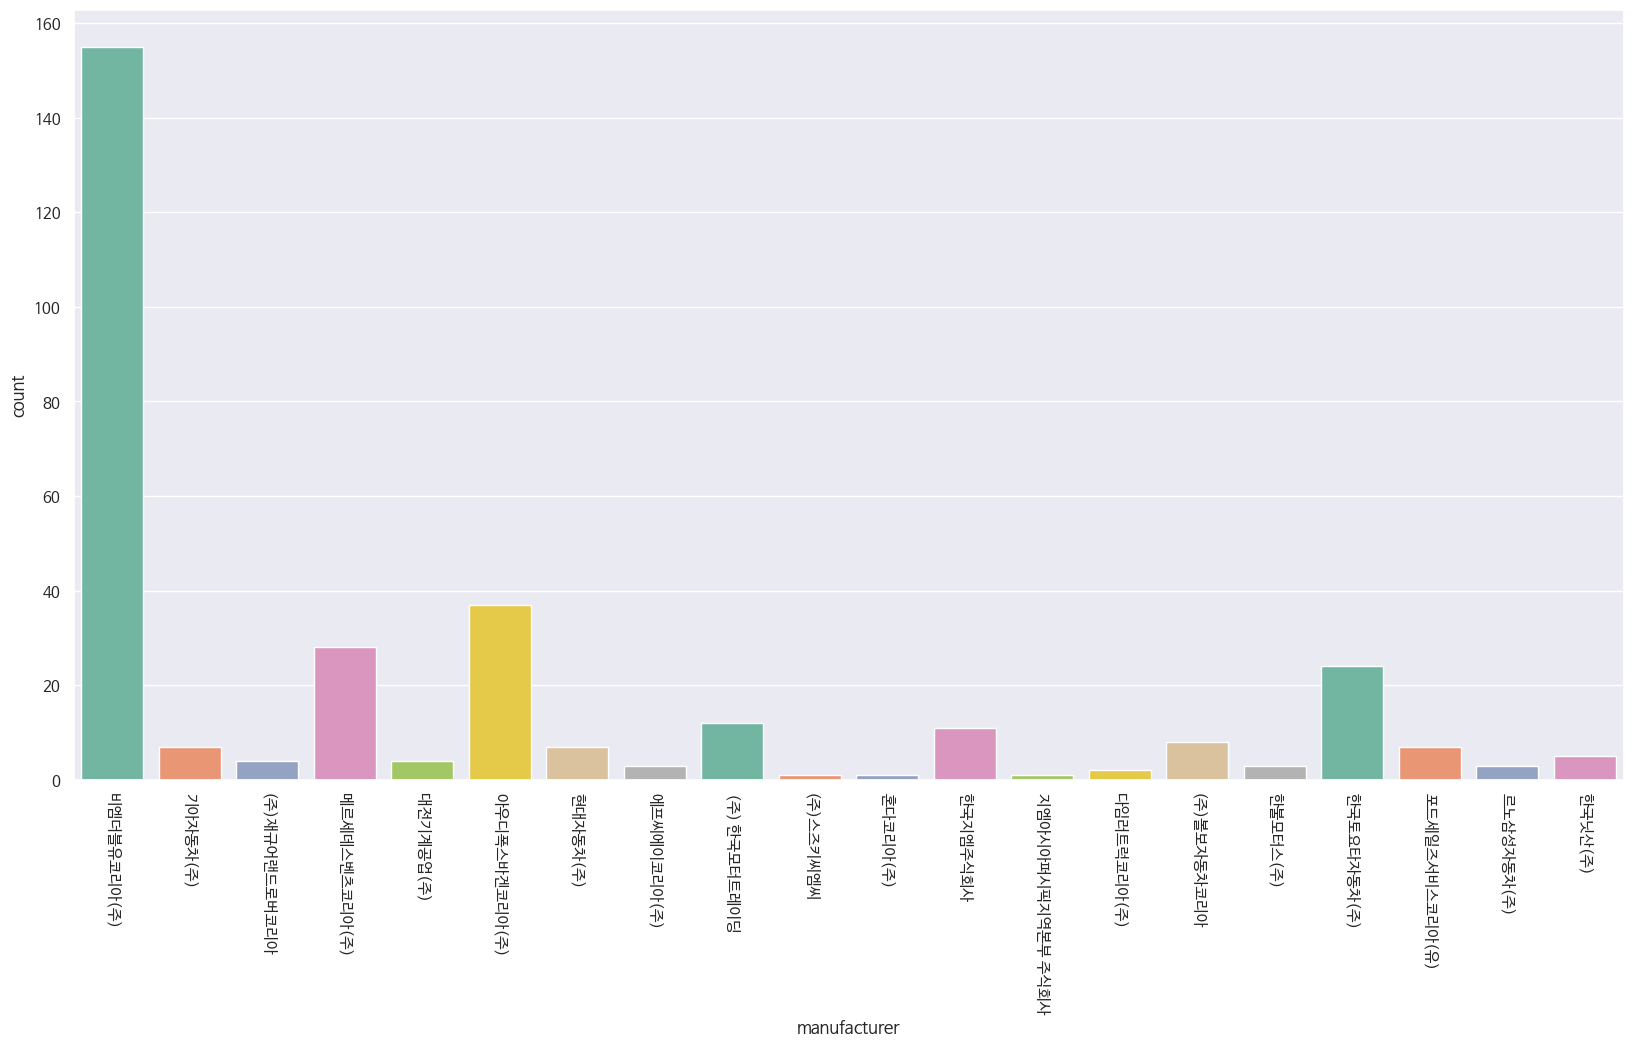

In [ ]:
# 그래프를 출력.
plt.figure(figsize=(20,10))
sns.set(font="NanumBarunGothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')

ax = sns.countplot(x="manufacturer", data=df[df.recall_month.isin([10,11,12])], palette="Set2")
plt.xticks(rotation=270)
plt.show()

### 3.6. 하반기 생산연도별 리콜 현황 출력

2020년 하반기(7~12월)에 개시된 리콜 건들을 생산 개시 연도를 기준으로 시각화.

In [ ]:
df['recall_month'] = df['recall_month'].astype('int')
# 해당 column을 지정하여 series 형태로 출력할 수 있음.
df[df["recall_month"]>=7].head()

,manufacturer,model,cause,start_year,start_month,start_day,end_year,end_month,end_day,recall_year,recall_month,recall_day
437,비엠더블유코리아(주),BMW 118d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,2,2019,4,29,2020,8,1
439,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,2,11,2014,11,24,2020,10,1
441,비엠더블유코리아(주),BMW 120d,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2015,3,13,2015,4,15,2020,8,1
443,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2013,10,11,2014,5,23,2020,10,1
445,비엠더블유코리아(주),BMW 220d Coupe,당사는 당사의 EGR 쿨러가 이전 리콜 대상 EGR 쿨러에 비하여 개선되고 최적화 ...,2014,10,16,2015,2,25,2020,8,1


<ipython-input-41-296d6178d89c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="start_year", data=df[df.recall_month>=7], palette="Set2")


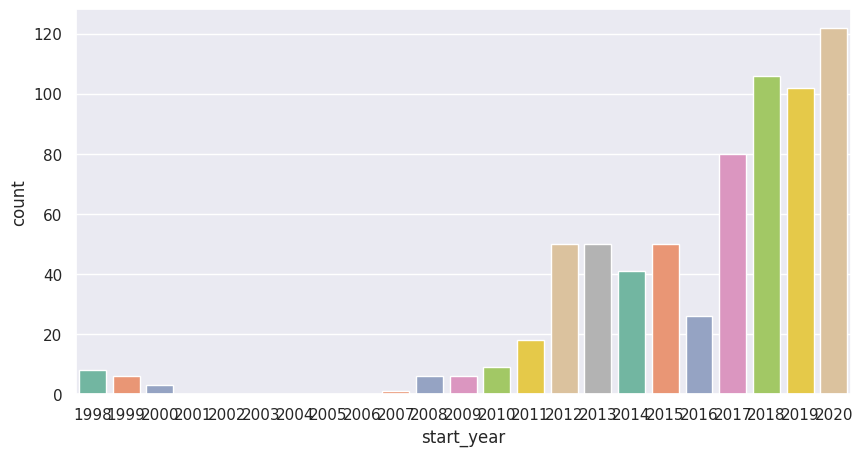

In [ ]:
# 그래프를 출력.
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")

ax = sns.countplot(x="start_year", data=df[df.recall_month>=7], palette="Set2")
plt.show()

### 3.7. 워드 클라우드를 이용한 리콜 사유 시각화

워드 클라우드를 이용하여 리콜 사유를 시각화해봅시다.

In [ ]:
# 워드 클라우드 생성을 도와주는 패키지를 가져옵니다.
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df.cause

,cause
0,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
1,스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑...
2,"콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품..."
3,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
4,"뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부..."
...,...
1270,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1271,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1272,프로펠러 샤프트의 내구성이 저하될 수 있습니다.
1273,프로펠러 샤프트의 내구성이 저하될 수 있습니다.


In [ ]:
# 문법적인 성분들을 배제하기 위해 stopwords들을 따로 저장해둠.
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

영어 기반의 데이터를 사용할 때는 상관 없지만, 한국어 기반의 데이터를 쓸 때에는 적합하지 않다. 이 프로젝트에서는 예시로 몇 개의 stopwords들을 수기로 작성하여 저장한다.

In [ ]:
# 손으로 직접 리콜 사유와 관련이 적은 문법적 어구들을 배제.
spwords = set(["동안", "인하여", "있는", "경우", "있습니다", "가능성이", "않을", "차량의", "가", "에", "될", "이",
               "인해", "수", "중", "시", "또는", "있음", "의", "및", "있으며", "발생할", "이로", "오류로", "해당"])

In [ ]:
# 리콜 사유에 해당하는 열의 값들을 중복 제거한 뒤 모두 이어붙여서 text라는 문자열로 저장.
text = ""

for c in df.cause.drop_duplicates():
    text += c

text[:1000]

'스탑 & 고 기능 작동 직후 재시동 불가 1) 결함 있는 구조 장치 : 원동기(스탑 & 고) 2) 결함 원인 : 오토 스타트 결함(스탑&고 작동 시 재시동 불가 현상)은 과도한 전압강하로 인해 발생되며 이는 충분한 전류량이 흐를 수 없는 불충분한 엔진 배선 및 주 양극 배선 사이즈로 인해 유발됨콤비네이션 미터(계기판) 내부 기판의 생산 설비 관리가 부적절하여, 기판의 회로부품 내부에 균열이 발생할 가능성이 있음.뒷좌석 시트벨트의 부품조립설비의 조정이 부적절하여, 시트벨트 리트랙터 잠금장치*내부의 스프링이 바르게 장착 되지 않았을 가능성이 있음. *시트벨트 리트랙터 잠금장치: 급정지나 충격이 있을 경우 또는 시트벨트가 빠르게 당겨질 경우에 시트벨트가 풀어지지 않게 잠그는 장치비금속 재료(황화망간 또는 기타 산화물)가 특정부분에 비정상적으로 집중되어 일정한 운행조건에서 크랭크축이 파손될 수 있는 가능성이 확인되었습니다.사이드 스탠드 제조 공정상 용접 불량으로 사이드 스탠드의 용접 부위가 부러질 수 있음. (#참고 사항 : 2019년식 이후 모델에 장착된 사이드 스탠드는 공급사가 바뀌면서 이와 같은 문제 없음)2019년 01월 30일부터 2019년 10월 21일까지 생산된 BMW M5, M8 Competition 모델 중 171대 차량의 변속기 배선 고정 공정 과정에서 배선을 고정하는 클립을 잘 못 장착하여 고정된 위치가 과도한 압착 및 변속기 등 주변에서 발생하는 열에 영향을 받아 배선이 단락 될 수 있습니다.2017년식 Explorer 차량의 전동시트(파워시트) 프레임 트랙의 가장자리에 날카로운 마무리가 남아있을 수 있습니다. 이렇게, 시트 프레임 트랙의 날카로운 마무리로 인하여, 앞좌석과 콘솔 사이에 손을 넣으면 다칠 수 있는 위험이 있기 때문에 이를 예방하기 위해 제작결함을 시정하고자 함2015-2018년식 Mondeo 차량은 시간이 지남에 따라 배터리 음극(-)단자 주변에 황산구리가 생성될 수 있으며, 생성된 황산구리로 인하여 배터리 모니터링 센서 하단부

워드 클라우드를 생성하고 시각화.

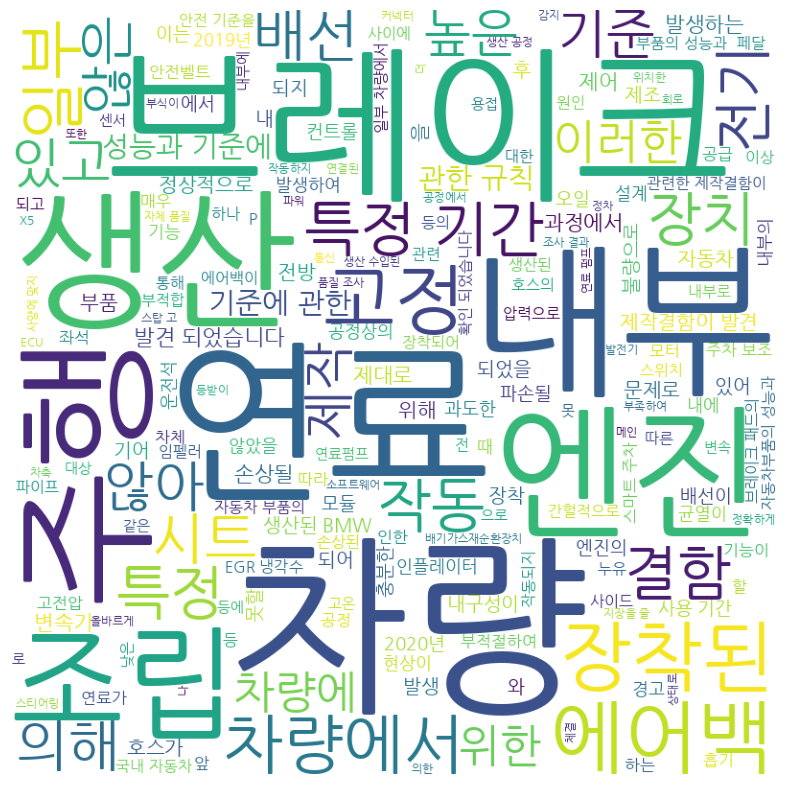

In [ ]:
# 한글을 사용하기 위해서는 폰트를 지정.
wc1 = WordCloud(max_font_size=200, stopwords=spwords, font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
                background_color='white', width=800, height=800)
wc1.generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

**실습 4** <br>
기아자동차(주)의 제품 중 가장 최근에 리콜이 개시된 제품의 모델명을 구하세요.

In [ ]:
#가장 최근에 리콜이 개시된 제품의 모델명을 구하는 코드 작성

 ---